In [ ]:
from pathlib import Path

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.gridspec as gridspec
from sunpy.map import Map
from astropy.visualization import ImageNormalize, AsinhStretch

from torchmetrics import MeanAbsoluteError
from torchmetrics.regression import PearsonCorrCoef
from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure

from img2img.data.preprocess.sdo.preprocess_aia import NormalizeEditor
def denorm(x):
    x = NormalizeEditor(0, 14).inverse(x)
    return x

def norm(x):
    x = NormalizeEditor(0, 14).call(x)
    return x

In [ ]:
stage = "test"
# stage = "val"
real_root = Path("D:/workspace/image-to-image/data/aia_dataset") / stage
real_input_root = real_root / "input"
real_target_root = real_root / "target"

In [ ]:
real_input_files = sorted(real_input_root.glob("*.npz"))
len(real_input_files)

244

In [ ]:
idx = -1
real_input_file = real_input_files[idx]
print("Real Input")
print(real_input_file)
timestamp = real_input_file.stem[:19]
timestamp_str = timestamp[:10] + timestamp[10:].replace("-", ":")
print(timestamp)
print(timestamp_str)

Real Input
D:\workspace\image-to-image\data\aia_dataset\test\input\2023-10-31T00-00-00_171_304.npz
2023-10-31T00-00-00
2023-10-31T00:00:00


In [ ]:
real_target_files = sorted(real_target_root.glob("*.npz"))
len(real_target_files)

244

In [ ]:
real_target_file = real_target_files[idx]
assert real_target_file.stem[:19] == timestamp
print("Real Target")
print(real_target_file)

Real Target
D:\workspace\image-to-image\data\aia_dataset\test\target\2023-10-31T00-00-00_193.npz


In [ ]:
real_input = np.load(real_input_file, allow_pickle=True)
real_target = np.load(real_target_file, allow_pickle=True)

In [ ]:
print(real_input["data"].shape, real_input["metas"].shape)
print(real_target["data"].shape, real_target["metas"].shape)

(2, 1024, 1024) (2,)
(1, 1024, 1024) (1,)


In [ ]:
real_inputs = [Map(data, meta) for data, meta in zip(real_input["data"], real_input["metas"])]
len(real_inputs)

2

In [ ]:
real_input_map_171 = real_inputs[0]
real_input_map_304 = real_inputs[1]

real_input_map_171 = denorm(real_input_map_171)
real_input_map_304 = denorm(real_input_map_304)

In [ ]:
real_target_map = Map(real_target["data"][0], real_target["metas"][0])
real_target_map = denorm(real_target_map)

In [ ]:
norm171 = ImageNormalize(vmin=0, vmax=2000, stretch=AsinhStretch(0.02))
norm304 = ImageNormalize(vmin=0, vmax=2000, stretch=AsinhStretch(0.005))
norm193 = ImageNormalize(vmin=0, vmax=2000, stretch=AsinhStretch(0.04))

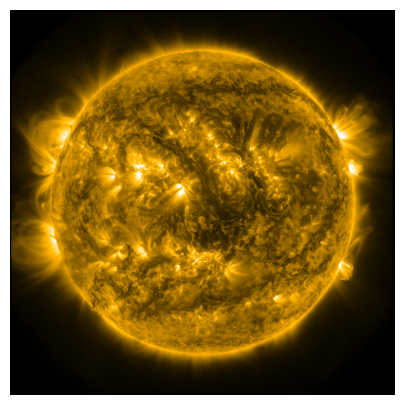

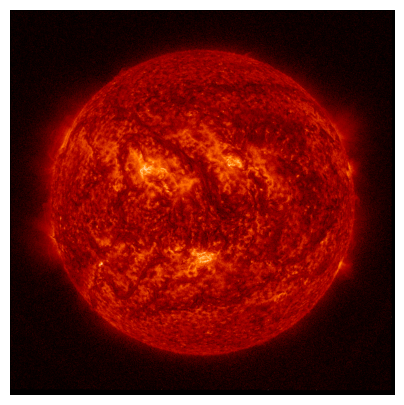

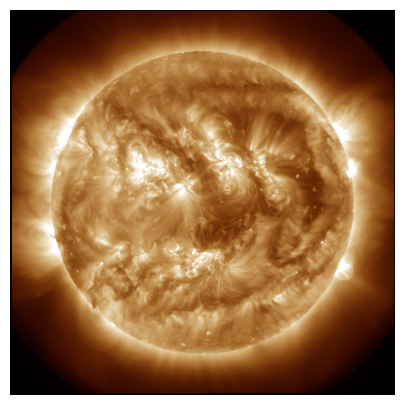

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(real_input_map_171.data, cmap="sdoaia171", origin="lower", norm=norm171)
ax.axis("off")
fig.savefig(f"{timestamp}_real_input_map_171.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(real_input_map_304.data, cmap="sdoaia304", origin="lower", norm=norm304)
ax.axis("off")
fig.savefig(f"{timestamp}_real_input_map_304.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(real_target_map.data, cmap="sdoaia193", origin="lower", norm=norm193)
ax.axis("off")
fig.savefig(f"{timestamp}_real_target_map_193.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()